In [3]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import seaborn as sns
%matplotlib inline

### Distribution Types

###### There are 4 types of distribution we are interested in
1. Normal Distribution(Gaussian) is for continuous values and we use cdf and pdf to evaluate probability
2. Poisson - is just like normal except it is only available at integer values
3. Binomial - coin flips or categorical - example - 7 successes out of 10 coin flips, 6 successes
4. Uniform - Each outcome is equally likely

#### 1a. Normal Distribution

In [11]:
#Generate random variables
mylist=np.random.randn(10000)
mylist.mean(),mylist.std()

(0.021326645563329614, 1.0000844733735303)

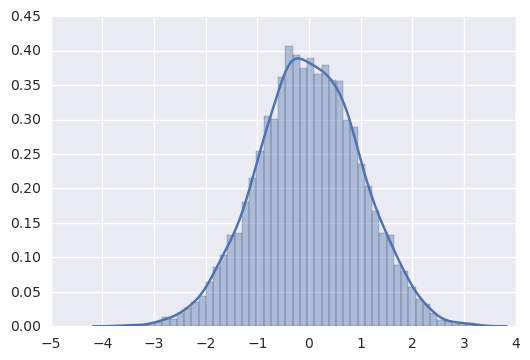

In [9]:
#Plot random variables
sns.distplot(mylist)

In [13]:
stats.norm.cdf(0,loc=mylist.mean(),scale=mylist.std())

0.49149326277613792

In [14]:
stats.norm.pdf(0,loc=mylist.mean(),scale=mylist.std())

0.39881789192296457

#### 2a. Poisson Distribution

In [16]:
np.random.r(100)

89

In [19]:
np.random.poisson(size=100)

array([1, 2, 3, 2, 0, 0, 2, 1, 1, 0, 2, 1, 0, 1, 0, 2, 1, 1, 0, 2, 2, 1, 0,
       1, 2, 1, 0, 2, 1, 1, 1, 1, 4, 0, 0, 2, 1, 1, 1, 0, 0, 0, 2, 0, 1, 0,
       0, 3, 2, 0, 0, 1, 1, 0, 1, 1, 0, 2, 2, 1, 1, 0, 2, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 2, 0, 1, 1, 1, 2, 0, 4, 0, 2, 1, 1, 0,
       0, 1, 1, 2, 1, 1, 0, 0])

In [90]:
binomlist=np.random.binomial(n=10,p=0.4,size=10)   # n is number of experiments & p is probability of success .
#.. k which is no of successes

In [72]:
binomlist

array([4, 5, 6, 4, 4, 4, 5, 4, 7, 6])

In [79]:
#This is the important one
stats.binom.pmf(xrange(100),n=100,p=0.5) # We will plot k which is defined by xrange(100)

array([  7.88860905e-31,   7.88860905e-29,   3.90486148e-27,
         1.27558808e-25,   3.09330110e-24,   5.93913812e-23,
         9.40363535e-22,   1.26277389e-20,   1.46797465e-19,
         1.50059631e-18,   1.36554264e-17,   1.11726216e-16,
         8.28636101e-16,   5.60922899e-15,   3.48573516e-14,
         1.99848816e-13,   1.06169683e-12,   5.24603142e-12,
         2.41900338e-11,   1.04399093e-10,   4.22816327e-10,
         1.61072886e-09,   5.78398092e-09,   1.96152396e-08,
         6.29322272e-08,   1.91313971e-07,   5.51867223e-07,
         1.51252498e-06,   3.94336870e-06,   9.79043264e-06,
         2.31706906e-05,   5.23209142e-05,   1.12816971e-04,
         2.32471335e-04,   4.58105277e-04,   8.63855666e-04,
         1.55973940e-03,   2.69792760e-03,   4.47287998e-03,
         7.11073227e-03,   1.08438667e-02,   1.58690732e-02,
         2.22922695e-02,   3.00686426e-02,   3.89525598e-02,
         4.84742966e-02,   5.79583981e-02,   6.65905000e-02,
         7.35270104e-02,

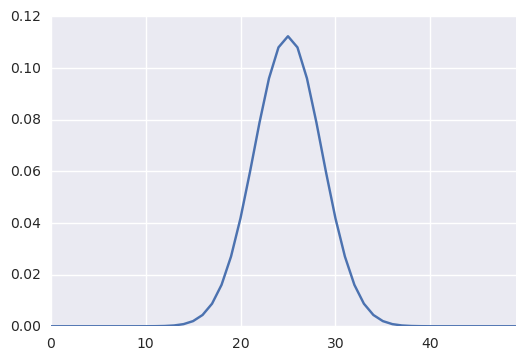

In [87]:
a=pd.Series(stats.binom.pmf(xrange(50),n=50,p=0.5))
a.plot()

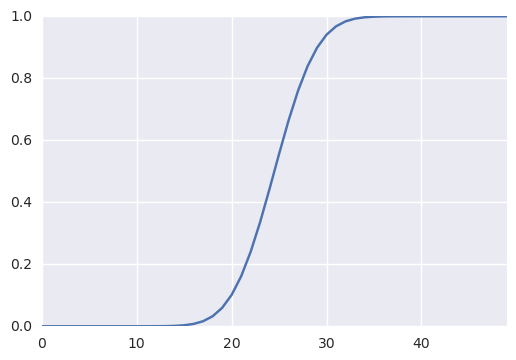

In [91]:
a=pd.Series(stats.binom.cdf(xrange(50),n=50,p=0.5))
a.plot()

## Statistical Tests

#### 1.T test

In [92]:
stats.ttest_1samp([50,40,70,75,45],popmean=70) # Probability of a sample occuring with the given values where population mean-70
# Since pvalue > 0.05, it is likely to get such a sample where mean is 70, in other words
# occurence of mean 56 for sample in population  of mean 70, likelihood is 0.11 which is >0.05
# So it is likely, in other words we accept the Null hypotheisis that Sample mean 56 equals Population  mean 70

Ttest_1sampResult(statistic=-2.0102828441296667, pvalue=0.11476192246455903)

In [70]:
help(stats.ttest_rel)

Help on function ttest_rel in module scipy.stats.stats:

ttest_rel(a, b, axis=0, nan_policy='propagate')
    Calculates the T-test on TWO RELATED samples of scores, a and b.
    
    This is a two-sided test for the null hypothesis that 2 related or
    repeated samples have identical average (expected) values.
    
    Parameters
    ----------
    a, b : array_like
        The arrays must have the same shape.
    axis : int or None, optional
        Axis along which to compute test. If None, compute over the whole
        arrays, `a`, and `b`.
    nan_policy : {'propagate', 'raise', 'omit'}, optional
        Defines how to handle when input contains nan. 'propagate' returns nan,
        'raise' throws an error, 'omit' performs the calculations ignoring nan
        values. Default is 'propagate'.
    
    Returns
    -------
    statistic : float or array
        t-statistic
    pvalue : float or array
        two-tailed p-value
    
    Notes
    -----
    Examples for the use are sc